In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [ ]:
test_cases = [0,1,2,3,4,5,'train_83p']
y_pred = np.empty((0,6,21))
y_gt = np.empty((0,6,21))

for tc in test_cases:
    print(f"start {tc}")
    model_folder = f"../training/saved/2024-04-03/{tc}_1_8_octaves"
    archive = np.load(model_folder + "/predictions.npz")
    print(f"{tc}: loaded archive")
    y_pred = np.concatenate((y_pred, archive["y_pred"]), axis=0)
    print(f"{tc}: loaded pred")
    y_gt = np.concatenate((y_gt, archive["y_gt"]), axis=0)
    print(f"{tc}: loaded gt")

In [28]:
# gt_total - total number in gt samples
# rt - right tab
# wtrn - wrong tab, right note
# x - nothing

frets = []
for i in range(0,6):
    frets.append([])
    for j in range(0,20):
        frets[i].append({
                "gt_total" : 0,
                "rt" : 0,
                "wtrn" : 0,
                "x" : 0
        })

l = len(y_pred)
for i in range(l):
    gt_tab = y_gt[i]
    pred_tab = y_pred[i]

    gt_metadata = notes_and_positions(gt_tab)
    pred_metadata = notes_and_positions(pred_tab)

    for string in range(0,6):
        gt_note = gt_metadata["notes"][string]
        gt_fret = gt_metadata["frets"][string]

        if gt_fret >= 0:
            frets[string][gt_fret]["gt_total"] += 1

        pred_note = pred_metadata["notes"][string]
        pred_fret = pred_metadata["frets"][string]

        found = False
        for aux_string in range(0,6):
            if gt_note > 0 and gt_note == pred_metadata["notes"][aux_string]:
                found = True
                if string == aux_string:
                    #it found the right position
                    frets[string][gt_fret]["rt"] += 1
                else:
                    frets[string][gt_fret]["wtrn"] += 1
        if not found and gt_fret >= 0:
            frets[string][gt_fret]["x"] += 1

for i in range(0,6):
    for j in range(0,20):
        print(f"String: {i+1}, fret: {j}, total: {frets[i][j]['gt_total']}, rt: {frets[i][j]['rt']}, wtrn: {frets[i][j]['wtrn']},x: {frets[i][j]['x']}")

String: 1, fret: 0, total: 16281, rt: 13226, wtrn: 0,x: 3055
String: 1, fret: 1, total: 11608, rt: 9956, wtrn: 0,x: 1652
String: 1, fret: 2, total: 9639, rt: 8414, wtrn: 0,x: 1225
String: 1, fret: 3, total: 13553, rt: 11911, wtrn: 0,x: 1642
String: 1, fret: 4, total: 13455, rt: 10792, wtrn: 0,x: 2663
String: 1, fret: 5, total: 7483, rt: 4102, wtrn: 1617,x: 1943
String: 1, fret: 6, total: 11300, rt: 8894, wtrn: 808,x: 1913
String: 1, fret: 7, total: 3929, rt: 1283, wtrn: 1467,x: 1445
String: 1, fret: 8, total: 2519, rt: 1068, wtrn: 897,x: 830
String: 1, fret: 9, total: 1501, rt: 89, wtrn: 1216,x: 266
String: 1, fret: 10, total: 1235, rt: 83, wtrn: 678,x: 514
String: 1, fret: 11, total: 115, rt: 0, wtrn: 101,x: 14
String: 1, fret: 12, total: 162, rt: 0, wtrn: 141,x: 35
String: 1, fret: 13, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret: 14, total: 15, rt: 0, wtrn: 13,x: 2
String: 1, fret: 15, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret: 16, total: 0, rt: 0, wtrn: 0,x: 0
String: 1, fret:

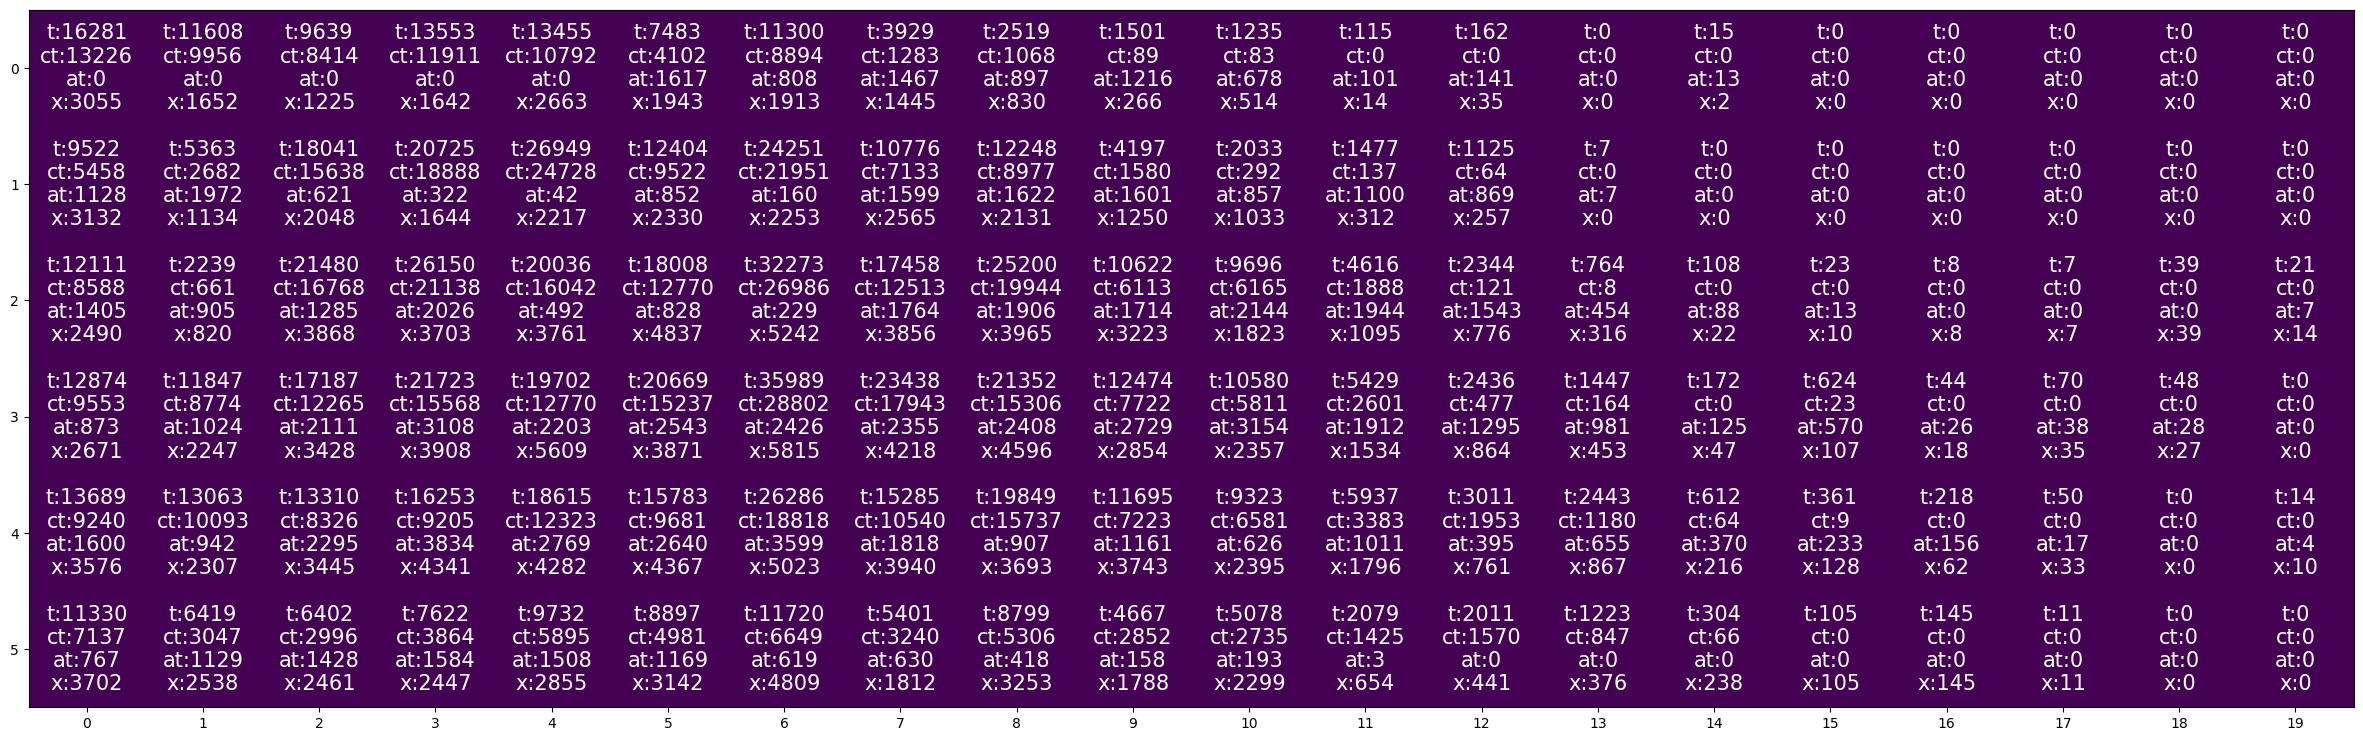

In [34]:
fig, ax = plt.subplots(figsize=(30,40))
heatmap = ax.imshow([[0]*20]*6)
for i in range(6):
    for j in range(20):
        text = ax.text(j, i, f"t:{frets[i][j]['gt_total']}\nct:{frets[i][j]['rt']}\nat:{frets[i][j]['wtrn']}\nx:{frets[i][j]['x']}", ha="center", va="center", color="w", fontsize=15)
plt.xticks(np.arange(0,20,1))
plt.show()